## Comparing precision-recall AUC and average precision score

During studies focused on GBM hyper-parameters, it has emerged the curiosity of assessing empirically the expected relationship between precision-recall AUC and average precision score, where both of these metrics are based on precision (ratio between true predicted positives and total predicted positives). Consequently, the estimated performance metrics related with GBM follow from those tests, while precision metrics for logistic regression models derived from previous estimations of a different research context.
<br>
Although very similar, these two performance metrics [diverge](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score) in their computation. So, it is reasonable to assess the *difference between average precision score and precision-recall AUC ($test\_prec\_avg - test\_pr\_auc$)* for different estimations of two alternative methods (logistic regression and GBM).
<br>
Below, both methods present more than 80% of estimations with average precision score larger than precision-recall AUC. Even so, the average of differences is close to zero (0.007 for logistic regression, and 0.003 for GBM except for outliers). Extreme negative values occurred with GBM estimation, for which 4 estimations had difference smaller than -0.1.
<br>
In addition to only some outliers presenting high differences between the two metrics, which points to a low average of difference, it was found a very high correlation between them of more than 95%. Therefore, concerning model selection, both metrics may be interchangeably used.
<br>
**Note:** differences for GBM estimation consist on the mean of differences over a range of values for the number of estimators.

---------------

**Summary:**
1. [Libraries](#libraries)<a href='#libraries'></a>.
2. [Importing data](#imports)<a href='#imports'></a>.
3. [Logistic regression](#lr)<a href='#lr'></a>.
4. [GBM](#gbm)<a href='#gbm'></a>.

<a id='libraries'></a>

## Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import json

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

<a id='imports'></a>

## Importing data

### Performance metrics

In [2]:
# Outcomes from logistic regression estimations:
os.chdir('/home/matheus_rosso/Arquivo/Features/Polynomials/Datasets/')

metrics_LR = pd.read_csv('metrics_LR.csv', dtype={'store_id': int})
metrics_LR['diff_avg_auc'] = metrics_LR.test_prec_avg - metrics_LR.test_pr_auc

# Outcomes from GBM estimations:
os.chdir('/home/matheus_rosso/Arquivo/Materiais/Codes/gbm_parameters/Codes')

tun_n_estimators = {}
with open('../Datasets/tun_n_estimators_005.json') as json_file:
    tun_n_estimators['005'] = json.load(json_file)

with open('../Datasets/tun_n_estimators_01.json') as json_file:
    tun_n_estimators['01'] = json.load(json_file)

### Dataset information

In [3]:
stores = []
n_orders = []
n_vars = []
avg_y = []

# Additional datasets information:
with open('../Datasets/data_info_dict.json') as json_file:
    data_info_dict = json.load(json_file)

# Loop over datasets:
for s in tun_n_estimators['01'].keys():
    stores.append(int(s))
    n_orders.append(int(tun_n_estimators['01'][s]['n_orders']))
    n_vars.append(int(tun_n_estimators['01'][s]['n_vars']))
    avg_y.append(data_info_dict[s]['avg_y'])

data_info = pd.DataFrame(data={'store_id': stores, 'n_orders': n_orders, 'n_vars': n_vars, 'avg_y': avg_y})
print('\033[1mShape of data_info:\033[0m ' + str(data_info.shape) + '.')
data_info.head()

Shape of data_info: (100, 4).


,store_id,n_orders,n_vars,avg_y
0,11729,2570,1596,0.037354
1,10311,1999,2534,0.014007
2,7988,1077,3051,0.082637
3,4736,945,2393,0.048677
4,3481,4378,2545,0.013020


<a id='lr'></a>

## Logistic regression

### Performance metrics

In [4]:
print('\033[1mShape of metrics_LR:\033[0m ' + str(metrics_LR.shape) + '.')
metrics_LR.head()

Shape of metrics_LR: (100, 17).


,store_id,n_orders,n_vars,first_date,last_date,fraud_rate,avg_order_amount,method,best_tun_param,avg_scores,test_roc_auc,test_prec_avg,test_pr_auc,test_deviance,test_brier_score,running_time,diff_avg_auc
0,11729,2570,1596,2020-02-06,2020-03-30,0.037354,228.760144,logistic_regression,0.1,0.043094,0.856387,0.241699,0.234384,884.021760,0.037176,0.17 minutes,0.007315
1,10311,1999,2534,2019-12-31,2020-03-30,0.014007,267.338549,logistic_regression,0.5,0.039896,0.761467,0.030169,0.021702,692.198446,0.025249,0.17 minutes,0.008467
2,7988,1077,3051,2020-01-01,2020-03-30,0.082637,1384.930251,logistic_regression,0.1,0.101978,0.673852,0.160857,0.153002,368.544427,0.073025,0.1 minutes,0.007855
3,4736,945,2393,2019-12-31,2020-03-30,0.048677,162.931524,logistic_regression,0.5,0.048856,0.991060,0.797542,0.788320,320.280417,0.017239,0.08 minutes,0.009221
4,3481,4378,2545,2020-01-01,2020-03-30,0.013020,175.374966,logistic_regression,0.1,0.021232,0.789114,0.087647,0.067384,1515.899458,0.008738,0.33 minutes,0.020263


### Correlation between precision metrics

In [5]:
print('\033[1mCorrelation between average precision score and precison-recall AUC:\033[0m')
metrics_LR[['test_prec_avg', 'test_pr_auc']].corr()[['test_prec_avg']]

Correlation between average precision score and precison-recall AUC:


,test_prec_avg
test_prec_avg,1.000000
test_pr_auc,0.999597


### Differences in precision metrics

In [6]:
print('\033[1mMean differences between average precision score and precision-recall AUC:\033[0m')
print('Number of positive mean differences: ' +
      str(sum(1 for x in metrics_LR.diff_avg_auc if x > 0)) + '.')
print('Number of negative mean differences: ' +
      str(sum(1 for x in metrics_LR.diff_avg_auc if x < 0)) + '.')
print('Number of missings: ' +
      str(sum(1 for x in metrics_LR.diff_avg_auc if np.isnan(x))) + '.')

Mean differences between average precision score and precision-recall AUC:
Number of positive mean differences: 94.
Number of negative mean differences: 2.
Number of missings: 3.


In [7]:
print('\033[1mMean differences between average precision score and precision-recall AUC:\033[0m')
metrics_LR[['diff_avg_auc']].describe().transpose()

Mean differences between average precision score and precision-recall AUC:


,count,mean,std,min,25%,50%,75%,max
diff_avg_auc,97.0,0.006561,0.008729,-0.010943,0.000958,0.0032,0.008638,0.041201


In [8]:
print('\033[1mAverage of diff_avg_auc for diff_avg_auc > 0:\033[0m ' +
      str(round(np.mean([x for x in metrics_LR.diff_avg_auc if x > 0]), 6)) + '.')
print('\033[1mAverage of diff_avg_auc for diff_avg_auc < 0:\033[0m ' +
      str(round(np.mean([x for x in metrics_LR.diff_avg_auc if x < 0]), 6)) + '.')

Average of diff_avg_auc for diff_avg_auc > 0: 0.006913.
Average of diff_avg_auc for diff_avg_auc < 0: -0.006693.


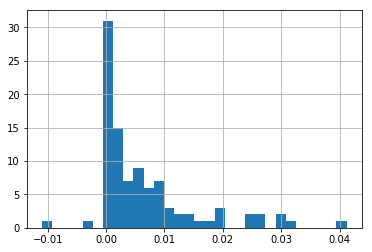

In [9]:
metrics_LR.diff_avg_auc.hist(bins=30)

<a id='gbm'></a>

## GBM

### Performance metrics

In [10]:
diff_avg_auc = {}
mean_diff_avg_auc = []
mean_avg_score = []
mean_pr_auc = []

# Loop over stores:
for s in tun_n_estimators['01'].keys():
    diff_avg_auc[s] = []
    
    # Loop over estimations:
    for n in tun_n_estimators['01'][s]['test_prec_avg'].keys():
        diff_avg_auc[s].append(tun_n_estimators['01'][s]['test_prec_avg'][n] - tun_n_estimators['01'][s]['test_pr_auc'][n])
    
    # Means of average precision score and precision-recall AUC:
    mean_avg_score.append(np.mean(list(tun_n_estimators['01'][s]['test_prec_avg'].values())))
    mean_pr_auc.append(np.mean(list(tun_n_estimators['01'][s]['test_pr_auc'].values())))
    
    # Mean of differences over all estimations and for a given store:
    mean_diff_avg_auc.append(np.nanmean(diff_avg_auc[s]))

/home/matheus_rosso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning:

Mean of empty slice



### Correlation between precision metrics

In [11]:
print('\033[1mCorrelation between average precision score and precison-recall AUC:\033[0m')
pd.DataFrame(data={'mean_avg_score': mean_avg_score, 'mean_pr_auc': mean_pr_auc}).corr()[['mean_avg_score']]

Correlation between average precision score and precison-recall AUC:


,mean_avg_score
mean_avg_score,1.000000
mean_pr_auc,0.940949


### Differences in precision metrics

In [12]:
print('\033[1mMean differences between average precision score and precision-recall AUC:\033[0m')
print('Number of positive mean differences: ' +
      str(sum(1 for x in mean_diff_avg_auc if x > 0)) + '.')
print('Number of negative mean differences: ' +
      str(sum(1 for x in mean_diff_avg_auc if x < 0)) + '.')
print('Number of missings: ' +
      str(sum(1 for x in mean_diff_avg_auc if np.isnan(x))) + '.')

Mean differences between average precision score and precision-recall AUC:
Number of positive mean differences: 80.
Number of negative mean differences: 17.
Number of missings: 3.


In [13]:
print('\033[1mMean differences between average precision score and precision-recall AUC:\033[0m')
pd.DataFrame(data=mean_diff_avg_auc, columns=['mean_diff_avg_auc']).describe().transpose()

Mean differences between average precision score and precision-recall AUC:


,count,mean,std,min,25%,50%,75%,max
mean_diff_avg_auc,97.0,-0.015428,0.091219,-0.499007,0.00048,0.002265,0.006456,0.06015


In [14]:
print('\033[1mAverage of diff_avg_auc for diff_avg_auc > 0:\033[0m ' +
      str(round(np.mean([x for x in mean_diff_avg_auc if x > 0]), 6)) + '.')
print('\033[1mAverage of diff_avg_auc for diff_avg_auc < 0:\033[0m ' +
      str(round(np.mean([x for x in mean_diff_avg_auc if x < 0]), 6)) + '.')

Average of diff_avg_auc for diff_avg_auc > 0: 0.007135.
Average of diff_avg_auc for diff_avg_auc < 0: -0.121607.


In [15]:
print('\033[1mAverage of diff_avg_auc without outliers:\033[0m ' +
      str(round(np.mean([x for x in mean_diff_avg_auc if x > -0.1]), 6)) + '.')

Average of diff_avg_auc without outliers: 0.004021.


Mean differences between average precision score and precision-recall AUC:


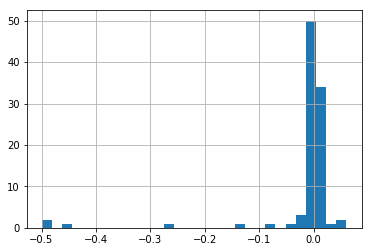

In [16]:
print('\033[1mMean differences between average precision score and precision-recall AUC:\033[0m')
pd.DataFrame(data=mean_diff_avg_auc, columns=['mean_diff_avg_auc']).mean_diff_avg_auc.hist(bins=30)

In [17]:
pd.DataFrame(data=mean_diff_avg_auc, columns=['mean_diff_avg_auc']).sort_values('mean_diff_avg_auc').head(10)

,mean_diff_avg_auc
94,-0.499007
77,-0.498256
76,-0.456949
7,-0.275283
81,-0.136898
49,-0.077375
93,-0.033468
80,-0.023205
75,-0.022153
59,-0.015781


In [18]:
metrics_LR[metrics_LR.store_id.isin([list(tun_n_estimators['01'].keys())[pd.DataFrame(data=mean_diff_avg_auc,
                    columns=['mean_diff_avg_auc']).mean_diff_avg_auc.idxmin()]])]

,store_id,n_orders,n_vars,first_date,last_date,fraud_rate,avg_order_amount,method,best_tun_param,avg_scores,test_roc_auc,test_prec_avg,test_pr_auc,test_deviance,test_brier_score,running_time,diff_avg_auc
94,1210,4028,2101,2020-01-01,2020-03-30,0.00149,412.945199,logistic_regression,1.0,0.000638,0.404975,0.00308,0.002015,1395.996527,0.001992,0.18 minutes,0.001065
